In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import random


## Breadth First Search -- BFS

In [2]:
def BFS(start, target, parent, node):
    queue = deque()  
    visited = [False for i in range(node)]

    queue.append(start)
    visited[start] = True
    
    while queue:
        u = queue.popleft()
        adj = G.adj[u]
        for v, wt in adj.items():
            if not visited[v] and wt['weight'] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
    
    return True if visited[target] else False
        
            

## FordFulkerson Algorithm

In [9]:
def FordFulkerson(source, sink, node):
    parent = [0 for i in range(node)]
    max_flow = 0
    
    while BFS(source, sink, parent, node):
        print("Parent: ", parent)
        current_flow = 1000000000
        u = sink
        while u is not source:
            wt = int(G[parent[u]][u]['weight'])
            current_flow = min(current_flow, wt) # G[1][key]['weight']
            u = parent[u]
        max_flow += current_flow
        
        v = sink
        while v is not source:
            p = parent[v]
            G[p][v]['weight'] -= current_flow
            G[v][p]['weight'] += current_flow
            v = p
    
    return max_flow
            

## Creating the Graph

In [4]:
def CreateGraph():
    G = nx.DiGraph()
    f = open('input.txt')
    n = int(f.readline())
    for i in range(n):
        u, v, w = f.readline().split()
        u = int(u)
        v = int(v)
        w = int(w)
        #print(u, type(u), v, type(v), w, type(w))
        G.add_edge(u, v, weight = w) 
        G.add_edge(v, u, weight = 0)
    return G


## Drawing Graph

In [5]:
def DrawGraph(G, color):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = color, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph


## Driving Function

Source: 0
Sink: 5


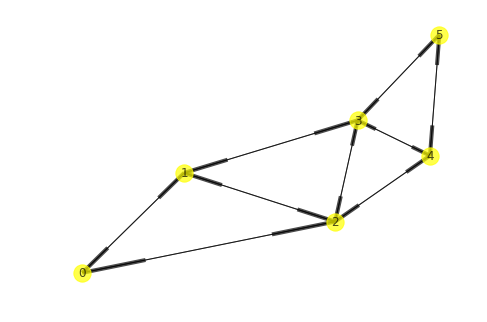

Parent:  [0, 0, 0, 1, 2, 3]
Parent:  [0, 0, 0, 4, 2, 4]
Parent:  [0, 0, 0, 4, 2, 3]
Max Flow:  23


In [17]:
if __name__ == "__main__":

    G = CreateGraph()
    
    node = len(G.nodes)
    source = int(input("Source: "))
    sink = int(input("Sink: "))
    
    #print(G.adj[0])
    #print(type(source), type(sink), node, type(node))
    
    DrawGraph(G, "yellow")
    plt.show()
    
    print("Max Flow: ", FordFulkerson(source, sink, node))
        